In [1]:
    import tensorflow as tf
    import matplotlib.pyplot as plt
    import pandas as pd
    import seaborn as sns

In [3]:
## Data Preprocessing
## Training Image preprocessing
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)


Found 70295 files belonging to 38 classes.


In [4]:
## Validation Preprocessing

validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)


Found 17572 files belonging to 38 classes.


In [5]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [6]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[ 26.    38.5   17.25]
   [ 36.    48.5   25.25]
   [ 59.75  74.75  47.5 ]
   ...
   [ 86.25 109.25  63.25]
   [ 83.25 106.25  60.25]
   [ 76.25  99.25  53.25]]

  [[ 30.5   47.5   19.5 ]
   [ 57.5   74.5   44.75]
   [ 89.25 109.    74.  ]
   ...
   [ 86.   110.    62.  ]
   [ 85.   108.    62.  ]
   [ 83.5  106.5   60.5 ]]

  [[ 61.    85.5   46.5 ]
   [ 86.   111.25  70.5 ]
   [100.5  127.5   84.  ]
   ...
   [ 82.25 108.25  60.25]
   [ 83.5  109.5   61.5 ]
   [ 85.75 111.75  64.75]]

  ...

  [[132.5  167.5  101.5 ]
   [137.75 172.75 106.75]
   [141.5  176.5  110.5 ]
   ...
   [ 20.75  35.25   9.  ]
   [ 12.5   25.     9.75]
   [ 14.    25.25  17.25]]

  [[129.75 164.75  98.75]
   [135.75 170.75 104.75]
   [140.25 175.25 107.25]
   ...
   [ 20.    33.75  11.  ]
   [ 15.25  28.25  10.  ]
   [ 15.    26.    10.5 ]]

  [[128.25 163.25  97.25]
   [131.   166.    98.  ]
   [136.25 171.25 103.25]
   ...
   [ 16.    29.    10.  ]
   [ 15.5   27.5    7.5 ]
   [ 12.5   24.5    

In [9]:
## Building Model
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential

In [10]:
model = Sequential()

In [12]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128, 128,3]))
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3,padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [15]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3,padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [16]:
model.add(Flatten())

In [17]:
model.add(Dense(units=1500,activation='relu'))

In [18]:
##Output Layer
model.add(Dense(units=38,activation='softmax'))

In [19]:
## Compiling Model
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 63, 63, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 31, 31, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 31, 31, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 15, 15, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,457,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,705,290 (17.95 MB)

 Trainable params: 4,705,290 (17.95 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
### Model Training
training_history = model.fit(x=training_set, validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1487s 672ms/step - accuracy: 0.5062 - loss: 1.7267 - val_accuracy: 0.8594 - val_loss: 0.4457
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1388s 632ms/step - accuracy: 0.8718 - loss: 0.4010 - val_accuracy: 0.9140 - val_loss: 0.2693
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1397s 636ms/step - accuracy: 0.9267 - loss: 0.2270 - val_accuracy: 0.9192 - val_loss: 0.2529
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1501s 683ms/step - accuracy: 0.9510 - loss: 0.1513 - val_accuracy: 0.9341 - val_loss: 0.2018
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1460s 665ms/step - accuracy: 0.9639 - loss: 0.1109 - val_accuracy: 0.9340 - val_loss: 0.2168
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1390s 632ms/step - accuracy: 0.9702 - loss: 0.0885 - val_accuracy: 0.9282 - val_loss: 0.2408
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1386s 631ms/step - accuracy: 0.9765 - loss: 0.0704 - val_accuracy: 0.9310 - val_loss: 0.2413
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1467s 667ms/s

In [22]:
## Model evaluation
train_loss, train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 480s 218ms/step - accuracy: 0.9854 - loss: 0.0418


In [23]:
print(train_loss, train_acc)

0.04041772335767746 0.9863005876541138


In [24]:
val_loss, val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 119s 216ms/step - accuracy: 0.9455 - loss: 0.2041


In [25]:
print(val_loss, val_acc)

0.20201146602630615 0.9444001913070679


In [27]:
### Saving moddel
model.save("trained_model.keras")

In [28]:
training_history.history

{'accuracy': [0.6842023134231567,
  0.8886407017707825,
  0.9324276447296143,
  0.9544917941093445,
  0.9650330543518066,
  0.9713777899742126,
  0.9772530198097229,
  0.9802546501159668,
  0.9831282496452332,
  0.9849206805229187],
 'loss': [1.0518420934677124,
  0.3437822163105011,
  0.20723655819892883,
  0.13951168954372406,
  0.1064106822013855,
  0.08379543572664261,
  0.06824327260255814,
  0.05968592315912247,
  0.051720160990953445,
  0.045882195234298706],
 'val_accuracy': [0.8594354391098022,
  0.9140109419822693,
  0.9192465543746948,
  0.9340997338294983,
  0.9340428113937378,
  0.9282380938529968,
  0.9309697151184082,
  0.9477008581161499,
  0.9441725611686707,
  0.9444001913070679],
 'val_loss': [0.4457385241985321,
  0.2693338990211487,
  0.2529090642929077,
  0.2018173784017563,
  0.21678954362869263,
  0.2407570630311966,
  0.2413347363471985,
  0.18837720155715942,
  0.1864674985408783,
  0.2020115852355957]}

In [29]:
##Record History in JSON
import json
with open("training_hist.json", "w") as f:
    json.dump(training_history.history, f)

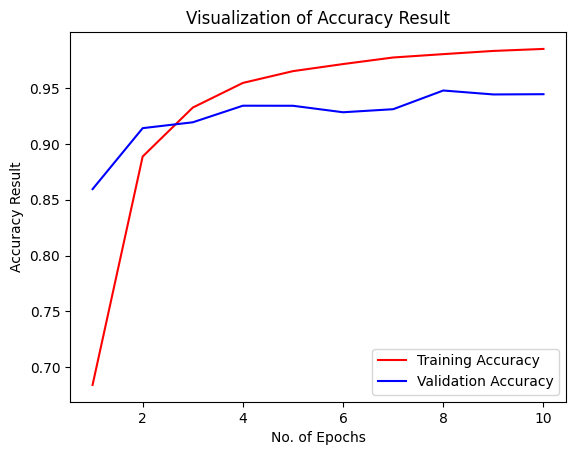

In [31]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

In [33]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [34]:
test_set =  tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [37]:
y_pred = model.predict(test_set)
y_pred, y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 116s 211ms/step


(array([[9.99999762e-01, 1.89673301e-07, 3.35916794e-10, ...,
         7.22215697e-15, 8.88995163e-14, 7.71159463e-14],
        [9.99999762e-01, 1.95948154e-11, 1.07715425e-13, ...,
         3.55642664e-12, 4.81481445e-14, 2.33858207e-14],
        [9.98712182e-01, 1.36715471e-07, 6.98332911e-08, ...,
         3.57684192e-14, 1.54649956e-11, 2.05577622e-09],
        ...,
        [7.73699398e-08, 1.36919235e-11, 3.31271122e-09, ...,
         1.55368468e-10, 4.28927796e-11, 9.99996662e-01],
        [1.96041628e-06, 2.77508658e-11, 1.27502746e-08, ...,
         2.20002863e-10, 4.30169789e-11, 9.99992728e-01],
        [2.16186714e-17, 1.26938392e-18, 2.62250367e-17, ...,
         9.35762103e-22, 6.59043778e-16, 1.00000000e+00]], dtype=float32),
 (17572, 38))

In [38]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [39]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [40]:
true_categories = tf.concat([y for x,y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [41]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [45]:
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
print(classification_report(Y_true, predicted_categories, target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.94      0.94      0.94       504
                                 Apple___Black_rot       0.98      0.97      0.97       497
                          Apple___Cedar_apple_rust       0.99      0.94      0.97       440
                                   Apple___healthy       0.97      0.86      0.91       502
                               Blueberry___healthy       0.98      0.95      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.96      0.97       421
                 Cherry_(including_sour)___healthy       0.98      0.97      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.91      0.94      0.93       410
                       Corn_(maize)___Common_rust_       0.99      0.98      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.96      0.95      0.

In [48]:
cm = confusion_matrix(Y_true, predicted_categories)
cm

array([[476,   5,   0, ...,   0,   0,   0],
       [  1, 480,   0, ...,   0,   0,   0],
       [  0,   0, 415, ...,   0,   0,   1],
       ...,
       [  0,   0,   0, ..., 484,   1,   0],
       [  0,   0,   0, ...,   0, 445,   0],
       [  0,   0,   0, ...,   0,   0, 478]], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

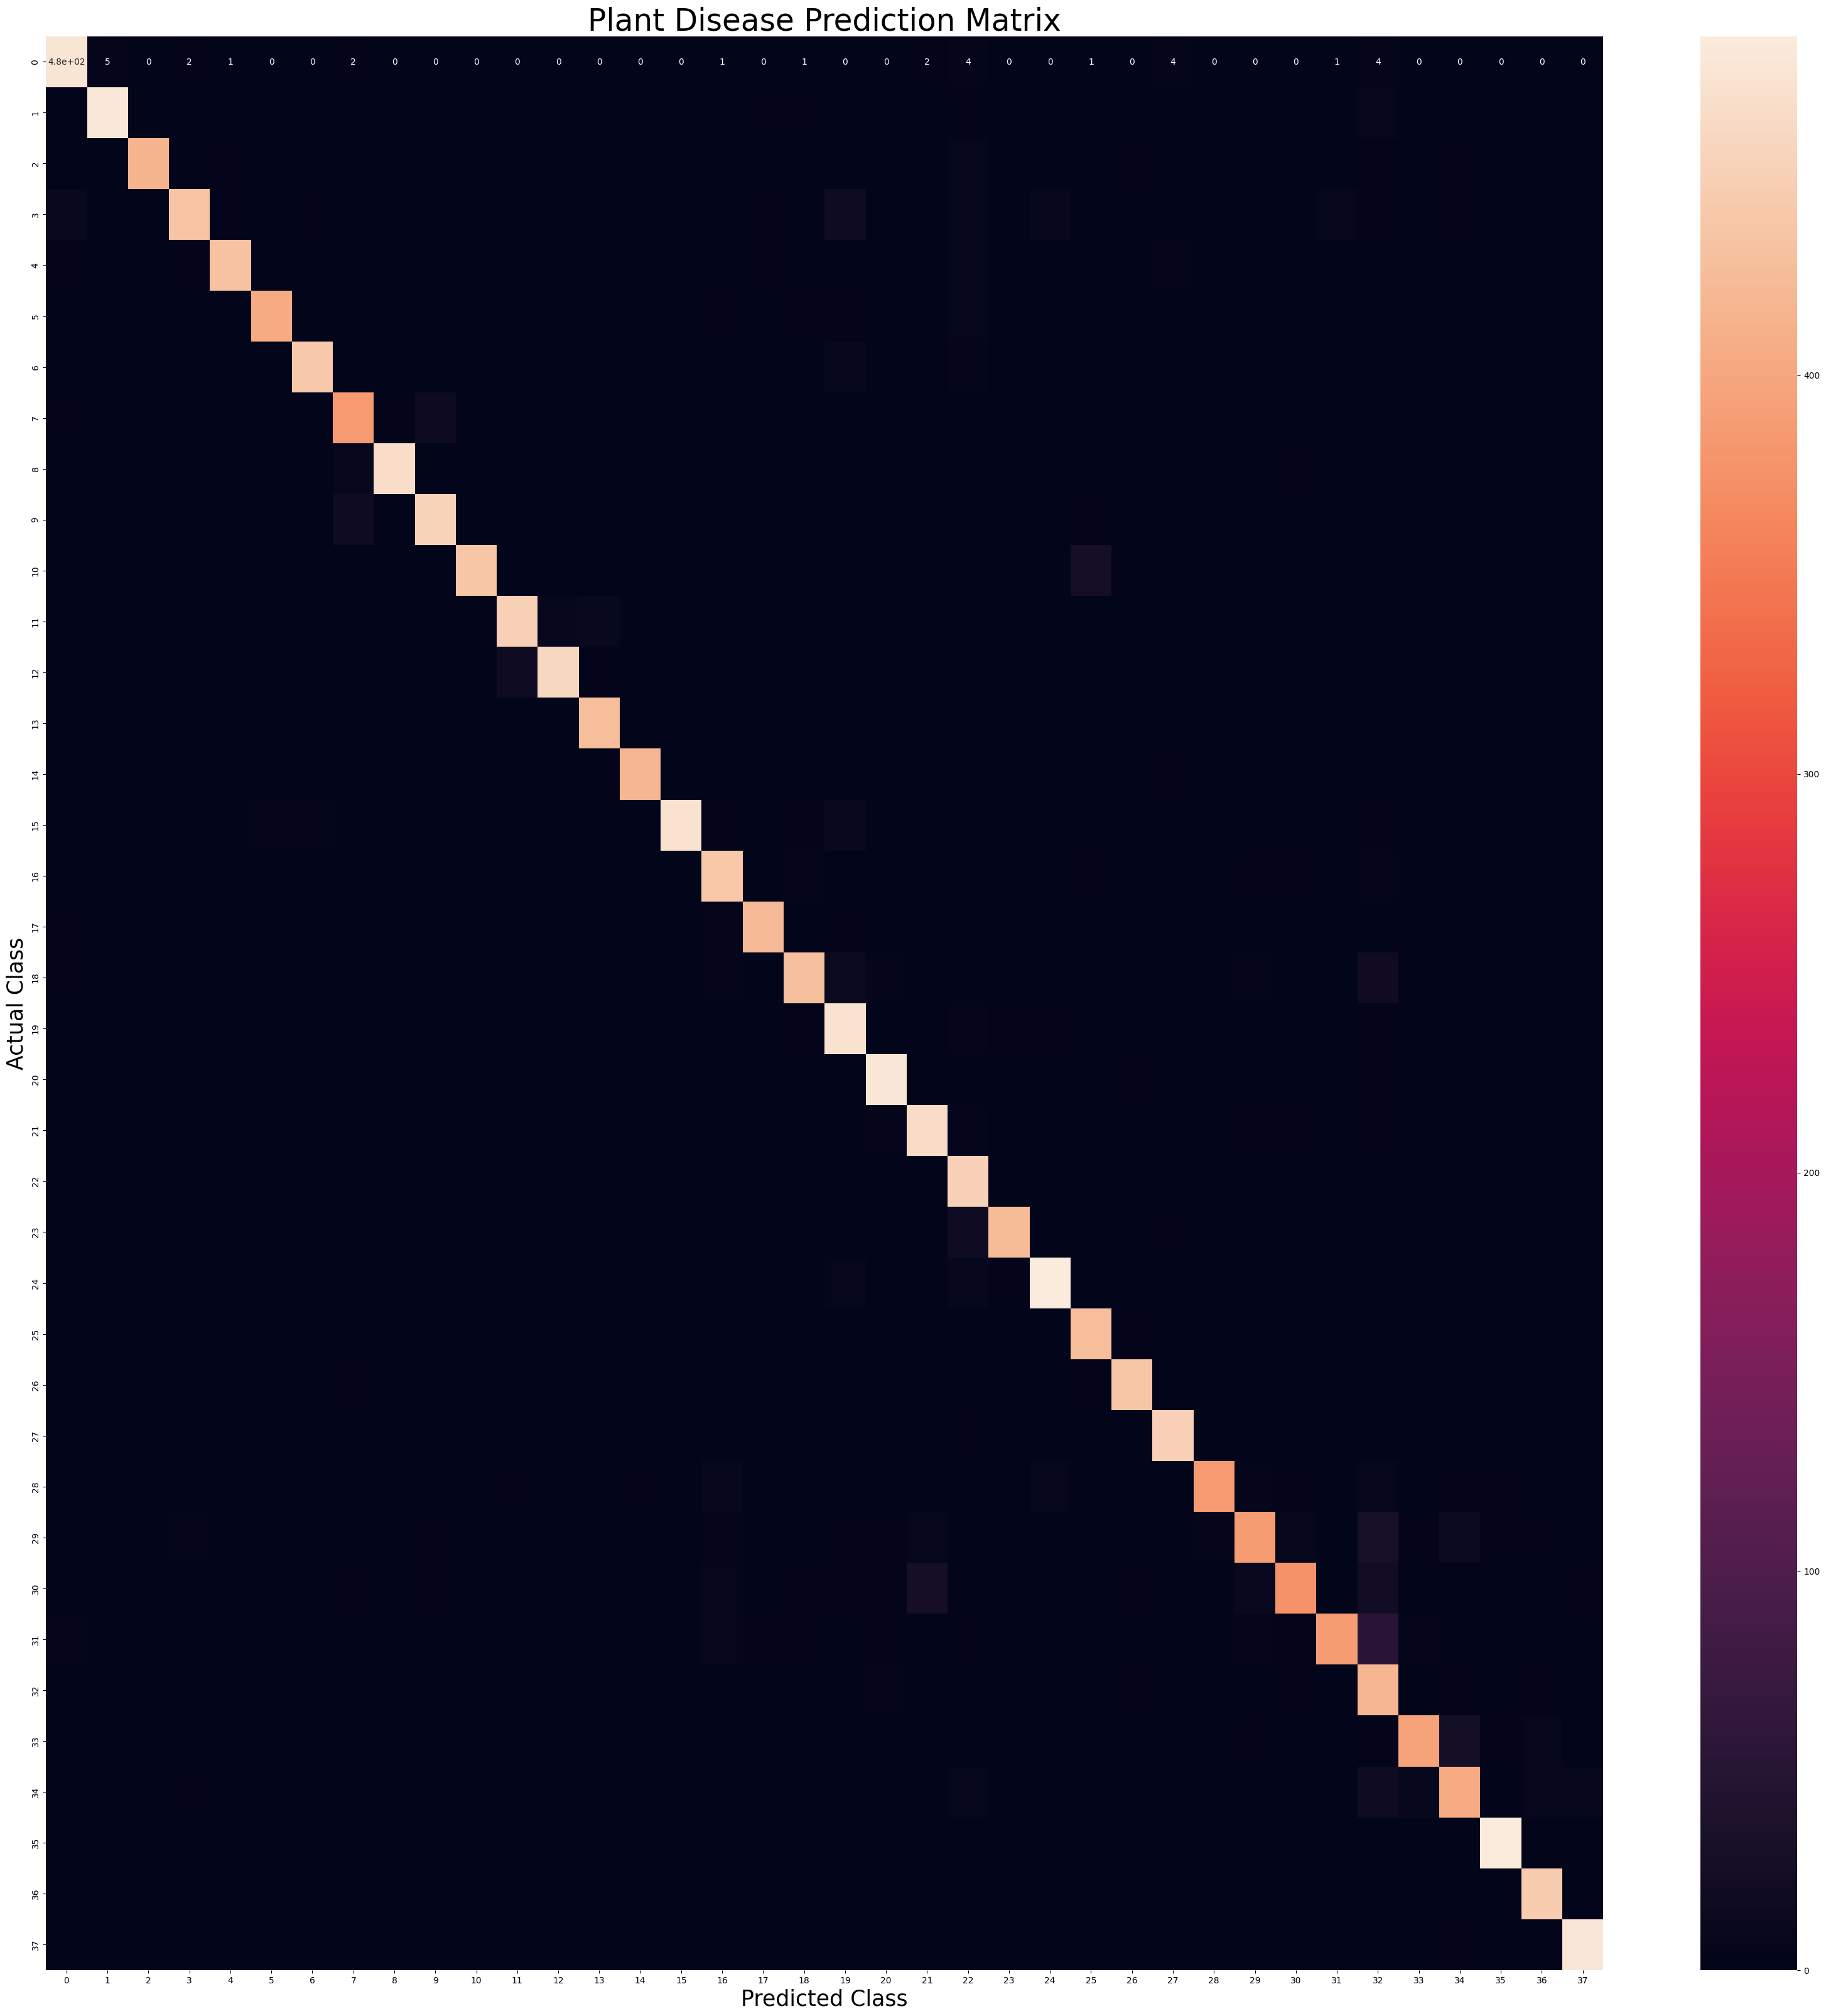

In [55]:
plt.figure(figsize=(40,40))
sns.heatmap(cm, annot=True, annot_kws={'size':10})
plt.xlabel("Predicted Class", fontsize=25)
plt.ylabel("Actual Class", fontsize=25)
plt.title("Plant Disease Prediction Matrix",fontsize=35)
plt.show